In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('smartphone_Given.csv')

In [4]:
df.head()

model     Price  rating  \
0              OnePlus 11 5G  Rs.54999    89.0   
1  OnePlus Nord CE 2 Lite 5G  Rs.19989    81.0   
2      Samsung Galaxy A14 5G  Rs.16499    75.0   
3       Motorola Moto G62 5G  Rs.14999    81.0   
4         Realme 10 Pro Plus  Rs.24999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2?GHz Processor  12?GB RAM, 256?GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2?GHz Processor   6?GB RAM, 128?GB inbuilt   
2        Exynos 1330, Octa Core, 2.4?GHz Processor    4?GB RAM, 64?GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2?GHz Processor   6?GB RAM, 128?GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6?GHz Processor   6?GB RAM, 128?GB inbuilt   

                                    battery  \
0  5000?mAh Battery with 100W Fast Charging   
1   5000?mAh Battery with 33W Fast Charging   
2   5000?mAh Battery with 15W Fast Charging   
3       5000?mAh Battery with Fast Charging   
4   5000?mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440?x?3216?px, 120 Hz Display wit...   
1  6.59 inches, 1080?x?2412?px, 120 Hz Display wi...   
2  6.6 inches, 1080?x?2408?px, 90 Hz Display with...   
3  6.55 inches, 1080?x?2400?px, 120 Hz Display wi...   
4  6.7 inches, 1080?x?2412?px, 120 Hz Display wit...   

                                              camera  \
0  50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...   
1  64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...   
2  50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...   
3  50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...   
4  108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1?TB  Android v12  
2  Memory Card Supported, upto 1?TB  Android v13  
3   Memory Card (Hybrid), upto 1?TB  Android v12  
4         Memory Card Not Supported  Android v13

In [5]:
# Removing "Rs" From Price
df['price'] = df['Price'].str.replace('Rs.', '')

# spliting sim column
# Check for the presence of "5G", "NFC" and "IR Blaset" in the "sim_data" column
df['has_5g'] = df['sim'].str.contains('5G', case=False, na=False)
df['has_nfc'] = df['sim'].str.contains('NFC', case=False, na=False)
df['has_ir_blaster'] = df['sim'].str.contains('IR Blaster', case=False, na=False)
df['brand_name'] = df['model'].str.split().str[0]


In [6]:
df['processor_brand'] = df['processor'].str.split().str[0]
df.loc[df['processor'].str.split().str[0].str.contains('Octa|Core', case=False, na=False), 'processor_brand'] = ''
df['num_cores'] = df['processor'].str.extract(r'(\w+ Core)', expand=False)
processor_speeds = df['processor'].str.extract(r'(\d+\.?\d*)\??\s*GHz', expand=False)
df['processor_speed'] = processor_speeds.where(processor_speeds.str.match(r'^\d+\.?\d*$'), '')



In [16]:
df.head()

model  rating                        ram  \
0              OnePlus 11 5G    89.0  12?GB RAM, 256?GB inbuilt   
1  OnePlus Nord CE 2 Lite 5G    81.0   6?GB RAM, 128?GB inbuilt   
2      Samsung Galaxy A14 5G    75.0    4?GB RAM, 64?GB inbuilt   
3       Motorola Moto G62 5G    81.0   6?GB RAM, 128?GB inbuilt   
4         Realme 10 Pro Plus    82.0   6?GB RAM, 128?GB inbuilt   

                                    battery  \
0  5000?mAh Battery with 100W Fast Charging   
1   5000?mAh Battery with 33W Fast Charging   
2   5000?mAh Battery with 15W Fast Charging   
3       5000?mAh Battery with Fast Charging   
4   5000?mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440?x?3216?px, 120 Hz Display wit...   
1  6.59 inches, 1080?x?2412?px, 120 Hz Display wi...   
2  6.6 inches, 1080?x?2408?px, 90 Hz Display with...   
3  6.55 inches, 1080?x?2400?px, 120 Hz Display wi...   
4  6.7 inches, 1080?x?2412?px, 120 Hz Display wit...   

                                              camera  \
0  50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...   
1  64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...   
2  50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...   
3  50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...   
4  108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...   

                               card           os  price  has_5g  has_nfc  \
0         Memory Card Not Supported  Android v13  54999    True     True   
1   Memory Card (Hybrid), upto 1?TB  Android v12  19989    True    False   
2  Memory Card Supported, upto 1?TB  Android v13  16499    True    False   
3   Memory Card (Hybrid), upto 1?TB  Android v12  14999    True    False   
4         Memory Card Not Supported  Android v13  24999    True    False   

   has_ir_blaster brand_name processor_brand  num_cores processor_speed  \
0           False    OnePlus      Snapdragon  Octa Core             3.2   
1           False    OnePlus      Snapdragon  Octa Core             2.2   
2           False    Samsung          Exynos  Octa Core             2.4   
3           False   Motorola      Snapdragon  Octa Core             2.2   
4           False     Realme       Dimensity  Octa Core             2.6   

  battery_capacity  
0             5000  
1             5000  
2             5000  
3             5000  
4             5000

In [17]:
# Define a function to filter and extract battery capacity
def extract_battery_capacity(text):
    if 'mAh Battery' in text:
        # regex
        match = re.search(r'(\d+)\?mAh Battery', text)
        if match:
            return match.group(1)
    return ''


df['battery_capacity'] = df['battery'].apply(extract_battery_capacity)

In [21]:

df.to_csv('smartphone_Modified.csv', index=False)

In [22]:
# Define a function to extract fast charging values
def extract_fast_charging(text):
    # Use a regex to extract the numeric fast charging value
    match = re.search(r'(\d+)W Fast Charging', text)
    if match:
        return int(match.group(1))
    return 0

# Apply the function to the 'battery' column
df['fast_charging'] = df['battery'].apply(extract_fast_charging)


In [23]:
# Define a function to extract RAM capacity values
def extract_ram_capacity(text):
    # Use a regex to extract the numeric RAM capacity value
    match = re.search(r'(\d+)\?GB RAM', text)
    if match:
        return int(match.group(1))
    return 0

# Apply the function to the 'ram' column
df['ram_capacity'] = df['ram'].apply(extract_ram_capacity)


# Define a function to extract ROM capacity values
def extract_internal_memory(text):
    # Use a regex to extract the numeric RAM capacity value
    match = re.search(r'(\d+)\?GB inbuilt', text)
    if match:
        return int(match.group(1))
    return 0

# Apply the function to the 'ram' column
df['internal_memory'] = df['ram'].apply(extract_internal_memory)

In [24]:
columns = ['ram', 'battery']
df.drop(columns, inplace=True, axis=1)

In [25]:
# Define a function to extract Screen Size values
def extract_screen_size(text):
    # Use a regex to extract the numeric screen_size value
    match = re.search(r'(\d+\.?\d*)\s*inches', text)
    if match:
        return float(match.group(1))
    return 0.0

# Apply the function to the 'display' column
df['screen_size'] = df['display'].apply(extract_screen_size)

# Apply the function to the 'display' column
df['screen_size'] = df['display'].apply(extract_screen_size)

# Define a function to extract refresh rate values
def extract_refresh_rate(text):
    # Use a regex to extract the numeric refresh rate value
    match = re.search(r'(\d+)\s*Hz', text)
    if match:
        return int(match.group(1))
    return 0

# Apply the function to the 'display' column
df['refresh_rate'] = df['display'].apply(extract_refresh_rate)



In [26]:
# Define a function to extract and clean resolution from the 'display' column
def extract_resolution(display_text):
    import re
    pattern = r'(\d{3,4}\?x\?\d{3,4})'  # Updated regular expression pattern
    match = re.search(pattern, str(display_text))
    if match:
        resolution = match.group(1)
        return resolution.replace('?', '')  # Removing '?' characters
    else:
        return None

# Apply the function to create a new 'resolution' column
df['resolution'] = df['display'].apply(extract_resolution)

# D

In [27]:
columns = ['display']
df.drop(columns, inplace=True, axis=1)


In [28]:

# Remove '?' characters from the 'camera' column values
df['camera'] = df['camera'].str.replace('?', '')

# Define a function to count the occurrences of 'MP' before 'Rear' in each 'camera' text
def count_mp_before_rear(camera_text):
    if pd.isna(camera_text):  # Check if the value is NaN
        return 0
    else:
        rear_index = camera_text.find('Rear')  # Find the index of 'Rear' in the camera text
        if rear_index != -1:  # If 'Rear' is found
            mp_count = camera_text[:rear_index].count('MP')  # Count 'MP' occurrences before 'Rear'
            return mp_count
        else:
            return 0  # If 'Rear' is not found, return 0

# Create a new column 'num_rear_cameras' to store the count
df['num_rear_cameras'] = df['camera'].apply(count_mp_before_rear)


In [29]:
# Define a function to extract the MPs occurring after "Rear &" and return their count
def count_front_camera_mp(camera_text):
    if pd.isna(camera_text):  # Check if the value is NaN
        return 0
    else:
        rear_and_index = camera_text.find('Rear &')  # Find the index of 'Rear &' in the camera text
        if rear_and_index != -1:  # If 'Rear &' is found
            front_camera_text = camera_text[rear_and_index:]  # Extract text after "Rear &"
            mp_count = front_camera_text.count('MP')  # Count 'MP' occurrences after "Rear &"
            return mp_count
        else:
            return 0  # If "Rear &" is not found, return 0

# Create a new column 'front_camera_mp_count' to store the count of front camera MPs
df['num_front_cameras'] = df['camera'].apply(count_front_camera_mp)


In [30]:
df['primary_camera_rear'] = df['camera'].str.split().str[0].str.replace('MP', '')
df['primary_camera_front'] = df['camera'].str.extract(r'(\d+)\s*MP\s*Front')


In [31]:
# Extract OS value without alphanumeric characters and generate a new column 'os'
df['OS'] = df['os'].str.extract(r'([^\W\d_]+)')


In [32]:
# Fill NaN values in 'card' column with empty string
df['card'].fillna('', inplace=True)

# Assign 1 to 'extended_memory' where 'card' column contains 'Memory Card Supported'
df.loc[df['card'].str.contains('Memory Card Supported'), 'extended_memory'] = 1

# Assign 0 to 'extended_memory' where 'card' column contains 'Memory Card Not Supported'
df.loc[df['card'].str.contains('Memory Card Not Supported'), 'extended_memory'] = 0

# Assign 1 to 'extended_memory' where 'card' column contains 'Memory Card (Hybrid)'
df.loc[df['card'].str.contains('Memory Card \(Hybrid\)'), 'extended_memory'] = 1

# Fill NaN values in 'extended_memory' column with 0
df['extended_memory'].fillna(0, inplace=True)

# Cast 'extended_memory' column to integer
df['extended_memory'] = df['extended_memory'].astype(int)


<>:11: SyntaxWarning: invalid escape sequence '\('
<>:11: SyntaxWarning: invalid escape sequence '\('
/var/folders/2_/wcpcmyy167lgmcjqbc91q4nh0000gq/T/ipykernel_3618/56823019.py:11: SyntaxWarning: invalid escape sequence '\('
  df.loc[df['card'].str.contains('Memory Card \(Hybrid\)'), 'extended_memory'] = 1
/var/folders/2_/wcpcmyy167lgmcjqbc91q4nh0000gq/T/ipykernel_3618/56823019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('', inplace=True)
/var/folders/2_/wcpcmyy167lgmcjqbc91q4nh0000gq/T/ipykernel_361

In [33]:
# Fill NaN values in 'extended_memory' column with 0
df['extended_memory'].fillna(0, inplace=True)

# Cast 'extended_memory' column to integer
df['extended_memory'] = df['extended_memory'].astype(int)

/var/folders/2_/wcpcmyy167lgmcjqbc91q4nh0000gq/T/ipykernel_3618/1515035343.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['extended_memory'].fillna(0, inplace=True)


In [34]:
columns = ['camera','card','os']
df.drop(columns, inplace=True, axis=1)


In [36]:
df.to_csv('final_data.csv', index=False)

In [37]:
new_data = pd.read_csv('final_data.csv')

In [38]:
new_data.head()

model  rating  price  has_5g  has_nfc  has_ir_blaster  \
0              OnePlus 11 5G    89.0  54999    True     True           False   
1  OnePlus Nord CE 2 Lite 5G    81.0  19989    True    False           False   
2      Samsung Galaxy A14 5G    75.0  16499    True    False           False   
3       Motorola Moto G62 5G    81.0  14999    True    False           False   
4         Realme 10 Pro Plus    82.0  24999    True    False           False   

  brand_name processor_brand  num_cores  processor_speed  ...  \
0    OnePlus      Snapdragon  Octa Core              3.2  ...   
1    OnePlus      Snapdragon  Octa Core              2.2  ...   
2    Samsung          Exynos  Octa Core              2.4  ...   
3   Motorola      Snapdragon  Octa Core              2.2  ...   
4     Realme       Dimensity  Octa Core              2.6  ...   

   internal_memory  screen_size  refresh_rate  resolution  num_rear_cameras  \
0              256         6.70           120   1440x3216                 3   
1              128         6.59           120   1080x2412                 3   
2               64         6.60            90   1080x2408                 3   
3              128         6.55           120   1080x2400                 3   
4              128         6.70           120   1080x2412                 3   

   num_front_cameras primary_camera_rear  primary_camera_front       OS  \
0                  1                  50                  16.0  Android   
1                  1                  64                  16.0  Android   
2                  1                  50                  13.0  Android   
3                  1                  50                  16.0  Android   
4                  1                 108                  16.0  Android   

  extended_memory  
0               0  
1               1  
2               1  
3               1  
4               0  

[5 rows x 23 columns]

In [39]:
new_data.shape

(1020, 23)

In [26]:
new_data.dtypes

model                    object
rating                  float64
price                    object
has_5g                     bool
has_nfc                    bool
has_ir_blaster             bool
brand_name               object
processor_brand          object
num_cores                object
processor_speed         float64
battery_capacity        float64
fast_charging             int64
ram_capacity              int64
internal_memory           int64
screen_size             float64
refresh_rate              int64
resolution               object
num_rear_cameras          int64
num_front_cameras         int64
primary_camera_rear      object
primary_camera_front    float64
OS                       object
extended_memory           int64
dtype: object

In [40]:
new_data.describe().T

count         mean          std    min      25%  \
rating                 879.0    78.258248     7.402854   60.0    74.00   
processor_speed        945.0     2.417280     0.476551    1.0     2.05   
battery_capacity       987.0  4755.995947  1100.520066  800.0  4500.00   
fast_charging         1020.0    34.627451    35.835225    0.0     5.00   
ram_capacity          1020.0     6.288235     2.981339    0.0     4.00   
internal_memory       1020.0   130.505882    89.240141    0.0    64.00   
screen_size           1020.0     6.260402     1.313833    0.0     6.44   
refresh_rate          1020.0    66.873529    56.586917    0.0     0.00   
num_rear_cameras      1020.0     2.112745     1.001488    0.0     1.00   
num_front_cameras     1020.0     0.943137     0.301618    0.0     1.00   
primary_camera_front   919.0    16.090316    10.555564    1.0     8.00   
extended_memory       1020.0     0.616667     0.486437    0.0     0.00   

                          50%      75%       max  
rating                  80.00    84.00     89.00  
processor_speed          2.30     2.84      3.22  
battery_capacity      5000.00  5000.00  22000.00  
fast_charging           25.00    60.00    240.00  
ram_capacity             6.00     8.00     18.00  
internal_memory        128.00   128.00    512.00  
screen_size              6.56     6.67      8.03  
refresh_rate            90.00   120.00    240.00  
num_rear_cameras         2.00     3.00      3.00  
num_front_cameras        1.00     1.00      2.00  
primary_camera_front    16.00    16.00     60.00  
extended_memory          1.00     1.00      1.00

In [41]:
# Select only numeric columns
numeric_columns = new_data.select_dtypes(include='number')

# Replace missing or null values with the mean of numeric columns
new_data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())


In [42]:
print(new_data.isnull().sum())
print("----------------------------------------")

model                    0
rating                   0
price                    0
has_5g                   0
has_nfc                  0
has_ir_blaster           0
brand_name               0
processor_brand         14
num_cores               40
processor_speed          0
battery_capacity         0
fast_charging            0
ram_capacity             0
internal_memory          0
screen_size              0
refresh_rate             0
resolution              33
num_rear_cameras         0
num_front_cameras        0
primary_camera_rear      1
primary_camera_front     0
OS                      17
extended_memory          0
dtype: int64
----------------------------------------


In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1020 non-null   object 
 1   rating                1020 non-null   float64
 2   price                 1020 non-null   object 
 3   has_5g                1020 non-null   bool   
 4   has_nfc               1020 non-null   bool   
 5   has_ir_blaster        1020 non-null   bool   
 6   brand_name            1020 non-null   object 
 7   processor_brand       1006 non-null   object 
 8   num_cores             980 non-null    object 
 9   processor_speed       1020 non-null   float64
 10  battery_capacity      1020 non-null   float64
 11  fast_charging         1020 non-null   int64  
 12  ram_capacity          1020 non-null   int64  
 13  internal_memory       1020 non-null   int64  
 14  screen_size           1020 non-null   float64
 15  refresh_rate         

/var/folders/2_/wcpcmyy167lgmcjqbc91q4nh0000gq/T/ipykernel_3618/155352003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'rating', data = new_data, palette = 'Set3')


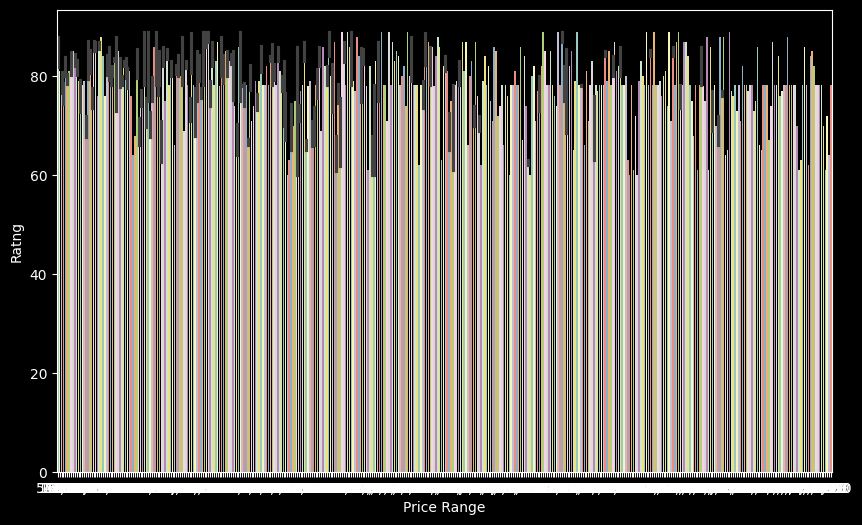

In [43]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'price', y = 'rating', data = new_data, palette = 'Set3')
plt.xlabel('Price Range')
plt.ylabel('Ratng')
plt.show()

                       model  rating  price  has_5g  has_nfc  has_ir_blaster  \
0              OnePlus 11 5G    89.0  54999    True     True           False   
1  OnePlus Nord CE 2 Lite 5G    81.0  19989    True    False           False   
2      Samsung Galaxy A14 5G    75.0  16499    True    False           False   
3       Motorola Moto G62 5G    81.0  14999    True    False           False   
4         Realme 10 Pro Plus    82.0  24999    True    False           False   

  brand_name processor_brand  num_cores  processor_speed  ...  \
0    OnePlus      Snapdragon  Octa Core              3.2  ...   
1    OnePlus      Snapdragon  Octa Core              2.2  ...   
2    Samsung          Exynos  Octa Core              2.4  ...   
3   Motorola      Snapdragon  Octa Core              2.2  ...   
4     Realme       Dimensity  Octa Core              2.6  ...   

   internal_memory  screen_size  refresh_rate  resolution  num_rear_cameras  \
0              256         6.70           120   1

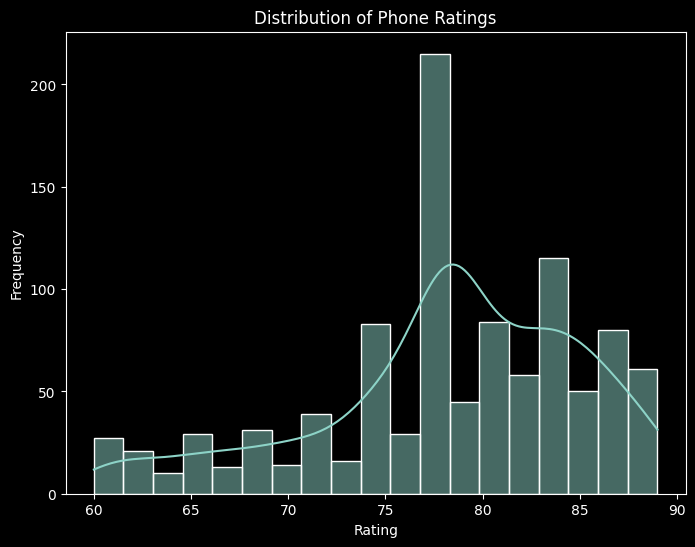

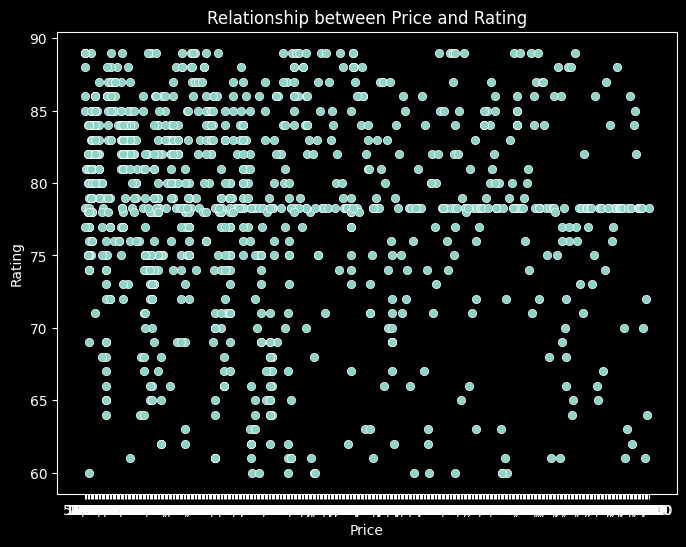

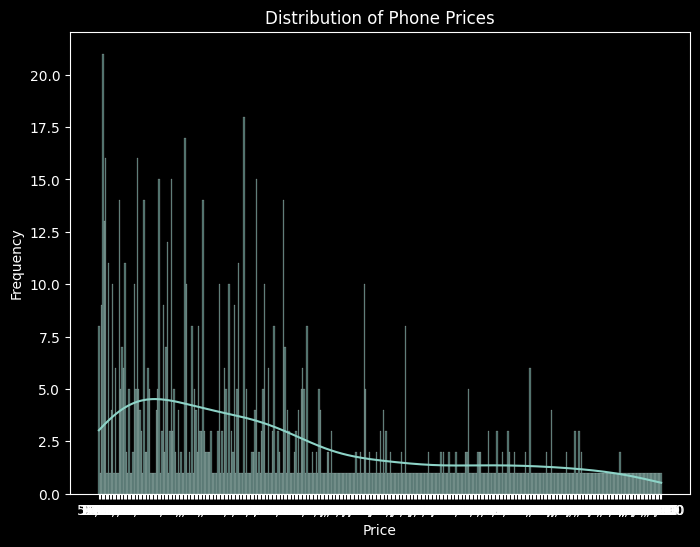

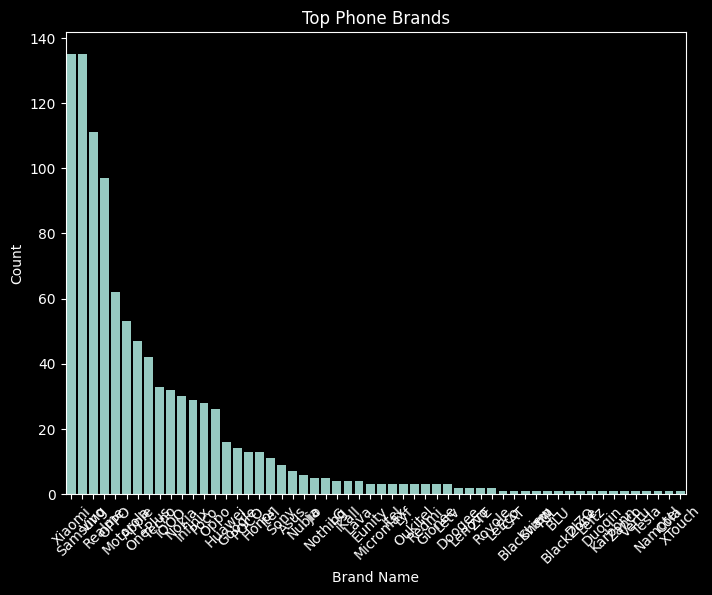

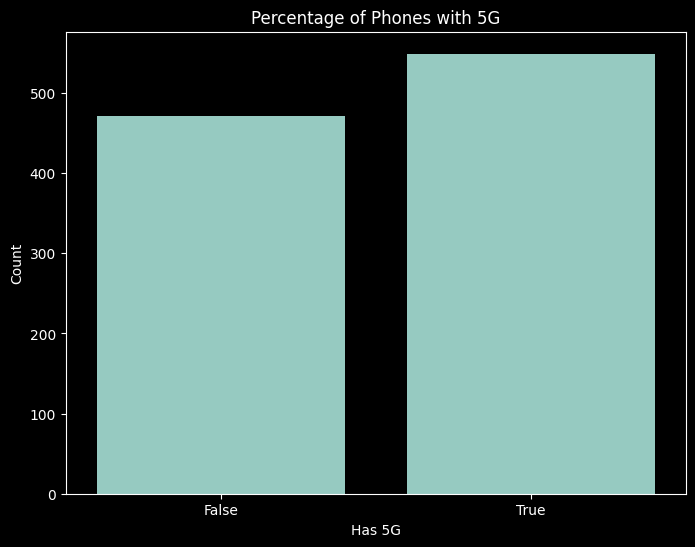

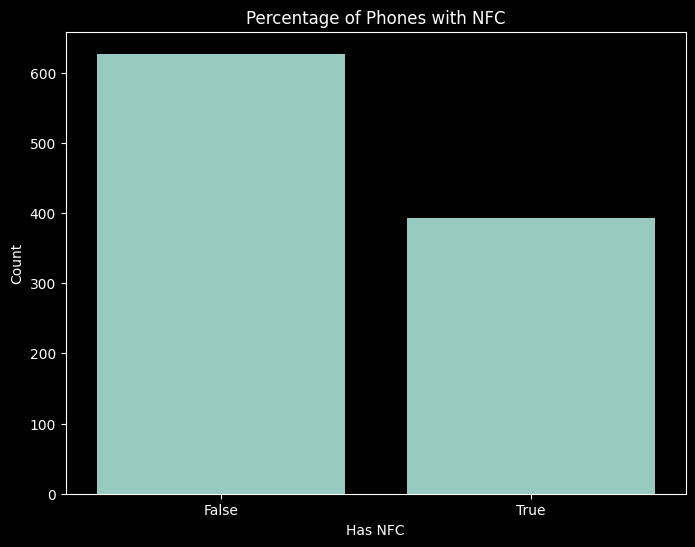

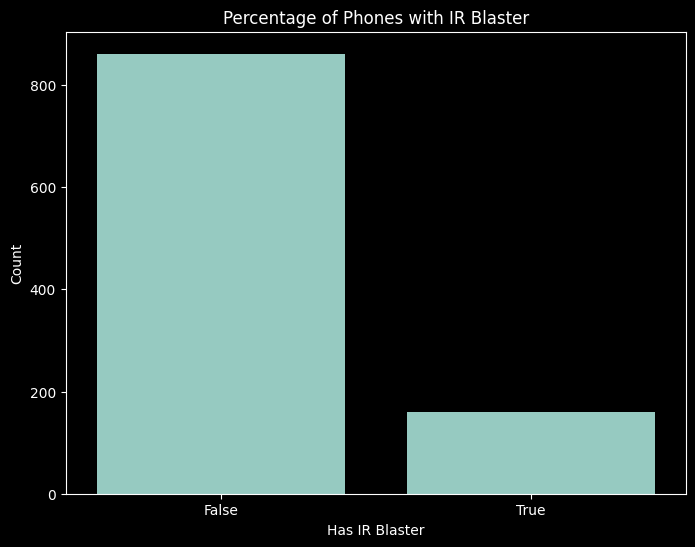

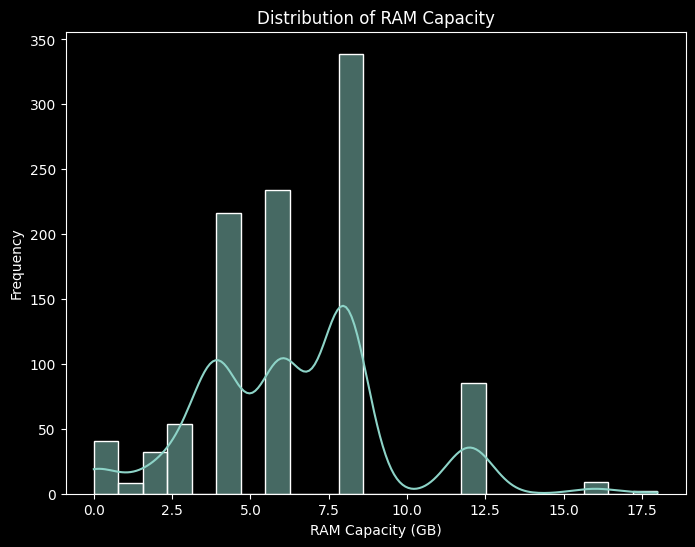

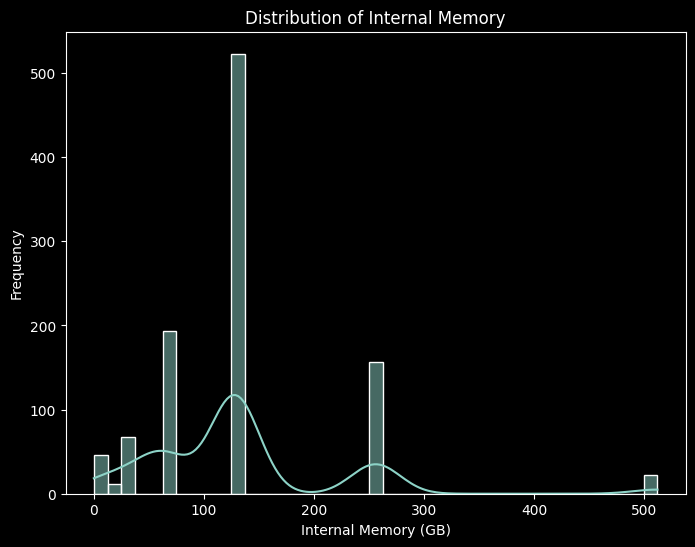

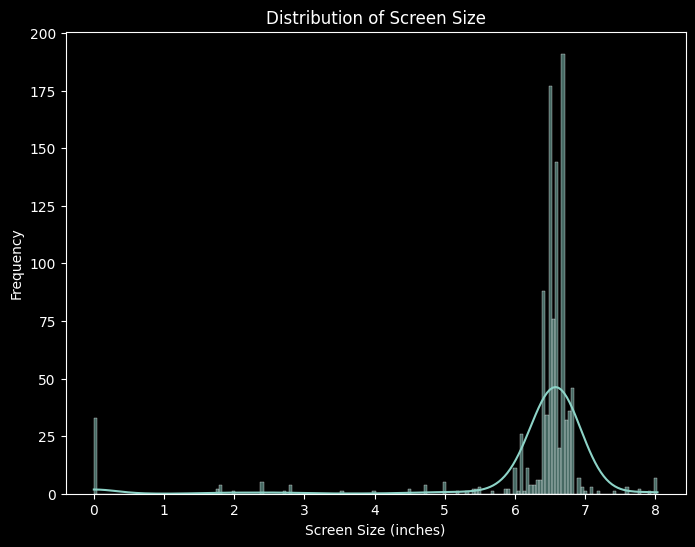

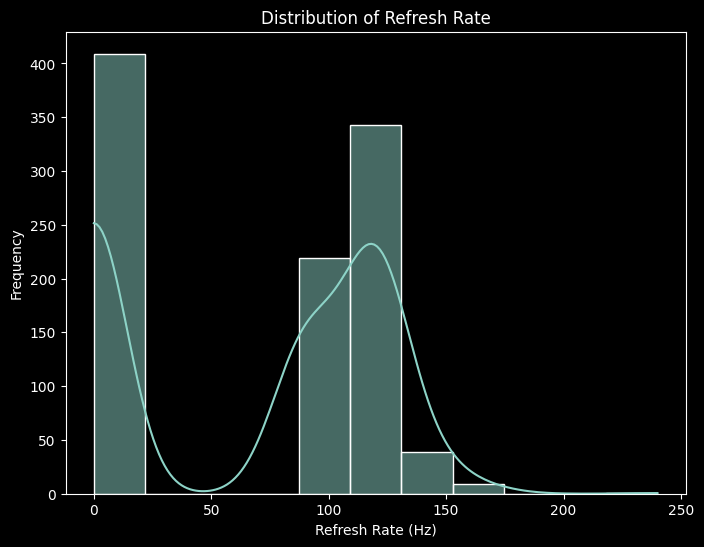

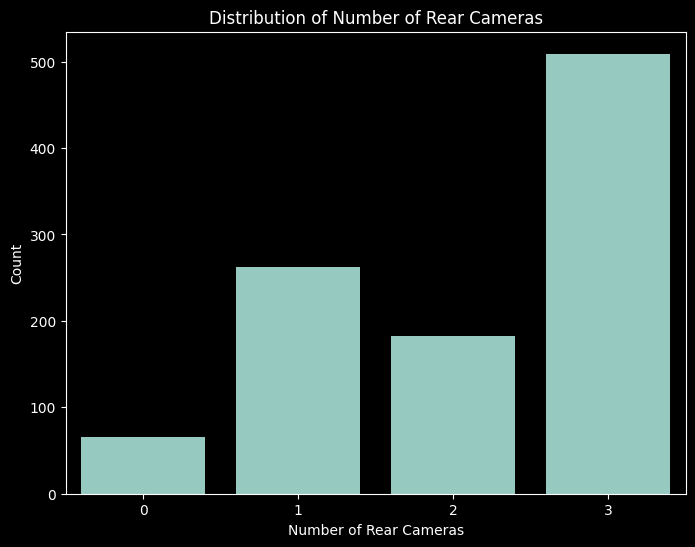

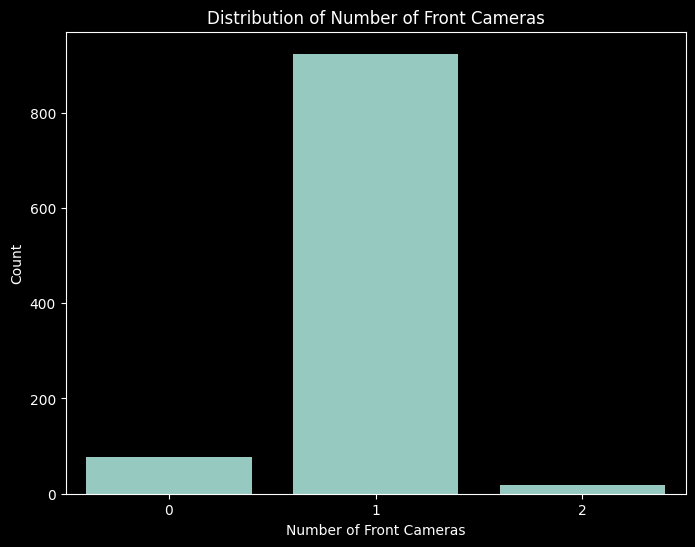

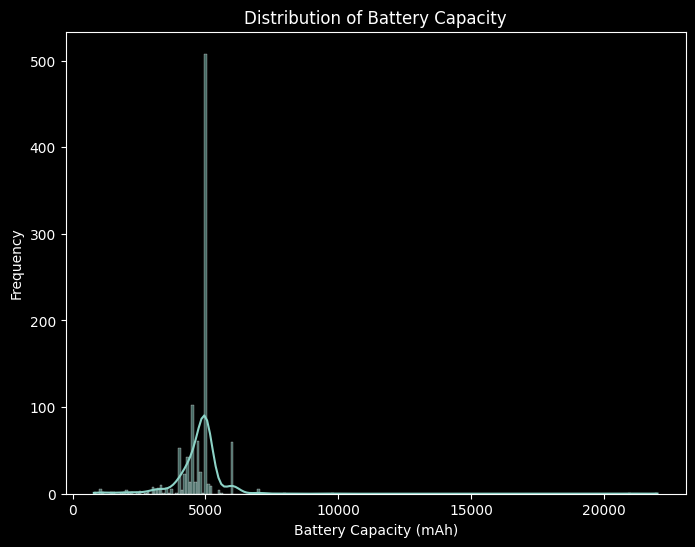

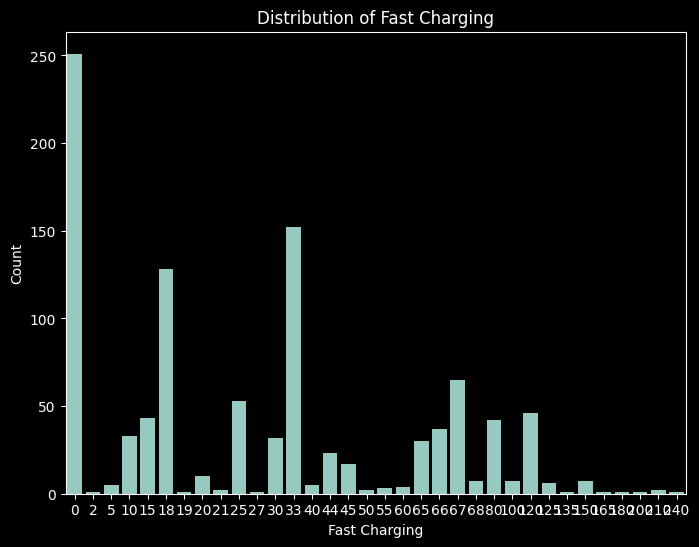

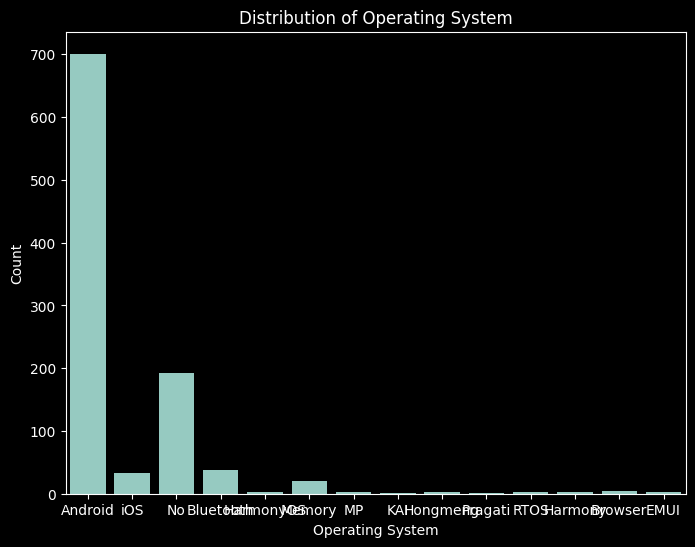

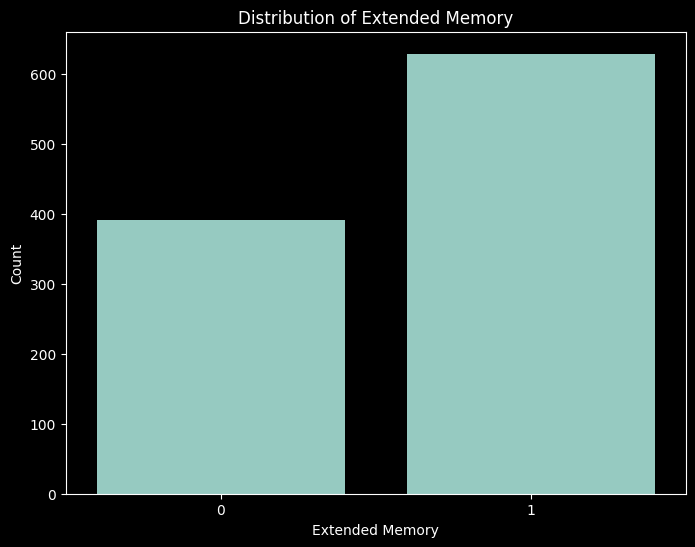

In [44]:
# 1. Data Overview
print(new_data.head())
print(new_data.info())
print(new_data.describe())

# 2. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(new_data['rating'], kde=True)
plt.title('Distribution of Phone Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 3. Relationship between Price and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=new_data)
plt.title('Relationship between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# 4. Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Phone Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 5. Top Brands
plt.figure(figsize=(8, 6))
sns.countplot(x='brand_name', data=new_data, order=new_data['brand_name'].value_counts().index)
plt.title('Top Phone Brands')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 6. Percentage of Phones with 5G
plt.figure(figsize=(8, 6))
sns.countplot(x='has_5g', data=new_data)
plt.title('Percentage of Phones with 5G')
plt.xlabel('Has 5G')
plt.ylabel('Count')
plt.show()

# 7. Percentage of Phones with NFC
plt.figure(figsize=(8, 6))
sns.countplot(x='has_nfc', data=new_data)
plt.title('Percentage of Phones with NFC')
plt.xlabel('Has NFC')
plt.ylabel('Count')
plt.show()

# 8. Percentage of Phones with IR Blaster
plt.figure(figsize=(8, 6))
sns.countplot(x='has_ir_blaster', data=new_data)
plt.title('Percentage of Phones with IR Blaster')
plt.xlabel('Has IR Blaster')
plt.ylabel('Count')
plt.show()

# 9. Distribution of RAM Capacity
plt.figure(figsize=(8, 6))
sns.histplot(new_data['ram_capacity'], kde=True)
plt.title('Distribution of RAM Capacity')
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Frequency')
plt.show()

# 10. Distribution of Internal Memory
plt.figure(figsize=(8, 6))
sns.histplot(new_data['internal_memory'], kde=True)
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.show()

# 11. Distribution of Screen Size
plt.figure(figsize=(8, 6))
sns.histplot(new_data['screen_size'], kde=True)
plt.title('Distribution of Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()

# 12. Distribution of Refresh Rate
plt.figure(figsize=(8, 6))
sns.histplot(new_data['refresh_rate'], kde=True)
plt.title('Distribution of Refresh Rate')
plt.xlabel('Refresh Rate (Hz)')
plt.ylabel('Frequency')
plt.show()

# 13. Distribution of Number of Rear Cameras
plt.figure(figsize=(8, 6))
sns.countplot(x='num_rear_cameras', data=new_data)
plt.title('Distribution of Number of Rear Cameras')
plt.xlabel('Number of Rear Cameras')
plt.ylabel('Count')
plt.show()

# 14. Distribution of Number of Front Cameras
plt.figure(figsize=(8, 6))
sns.countplot(x='num_front_cameras', data=new_data)
plt.title('Distribution of Number of Front Cameras')
plt.xlabel('Number of Front Cameras')
plt.ylabel('Count')
plt.show()

# 15. Distribution of Battery Capacity
plt.figure(figsize=(8, 6))
sns.histplot(new_data['battery_capacity'], kde=True)
plt.title('Distribution of Battery Capacity')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')
plt.show()

# 16. Distribution of Fast Charging
plt.figure(figsize=(8, 6))
sns.countplot(x='fast_charging', data=new_data)
plt.title('Distribution of Fast Charging')
plt.xlabel('Fast Charging')
plt.ylabel('Count')
plt.show()

# 17. Distribution of Operating System
plt.figure(figsize=(8, 6))
sns.countplot(x='OS', data=new_data)
plt.title('Distribution of Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

# 18. Distribution of Extended Memory
plt.figure(figsize=(8, 6))
sns.countplot(x='extended_memory', data=new_data)
plt.title('Distribution of Extended Memory')
plt.xlabel('Extended Memory')
plt.ylabel('Count')
plt.show()

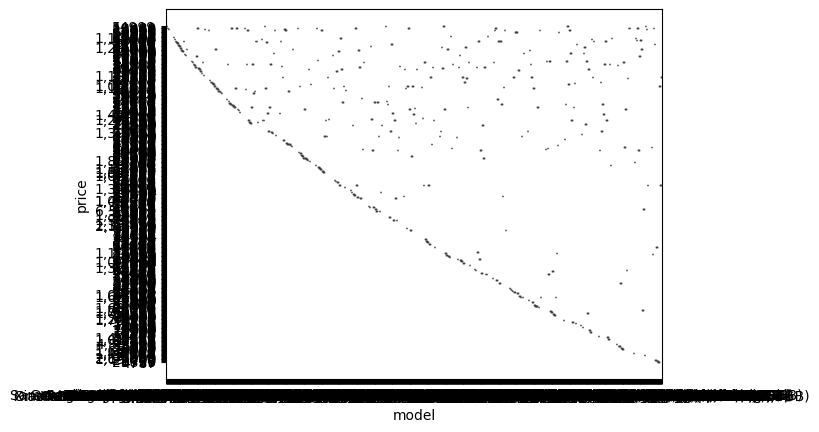

In [37]:
sns.boxplot(x="model", y="price", data=new_data)
plt.show()

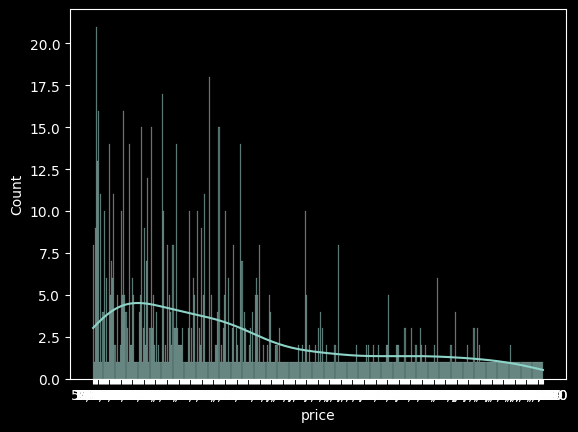

In [45]:
sns.histplot(data=new_data, x="price", kde=True, bins=30)
plt.show()

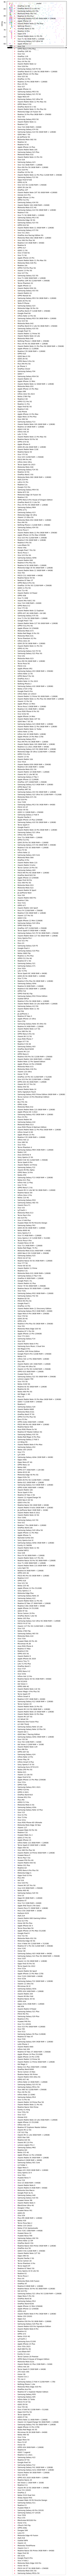

In [39]:
sns.scatterplot(data=new_data, x="price", y="rating", hue="model")
plt.show()

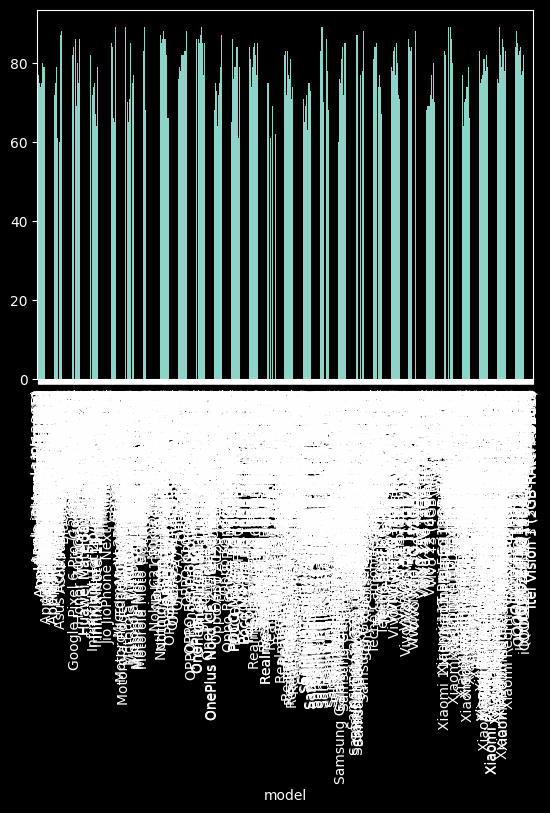

In [46]:
average_ratings = df.groupby("model")["rating"].mean()
average_ratings.plot(kind="bar")
plt.show()